# Building a Classifier from a Dataset to Predict the Absence or Presence of Heart Disease

## Introduction:

### Background Information:
Cardiovascular diseases remain the leading cause of death globally. Cardiovascular diseases encompass many different heart conditions which are characterized by several different variables. Therefore, it becomes difficult to characterize an individual with specific conditions as having heart disease. Because of this, data sets and corresponding algorithms are essential tools for physicians, researchers, and other healthcare workers when characterizing or diagnosing a condition such as heart disease.

### Research Question:
We attempt to answer the following question using a data set from Cleveland, Ohio regarding heart disease statistics: Considering a patient’s age, resting blood pressure, and serum cholesterol, will the heart disease diagnosis be classified as absent (FALSE) or present (TRUE)?

### Data set description:
The data set is from the 1980s and describes 14 different variables for patients who may have heart disease. For our project proposal, we previously utilized the patient's age, resting blood pressure, and serum cholesterol levels to ultimately create a classification which could aid us in answering the question posed above. Upon futher analysis, we decided to change our predictors to two variables: Maximum Heart Rate Achieved and Serum Cholesterol as they seem to work better together in describing the present or absence of heart disease (futher explanation offered below). We consider these variables as the most crucial and persuasive when wanting to determine the presence or absence of heart disease in a patient.

ADD MORE STUFF HERE ABOUT HOW WE CHANGED OUR PREDICTORS

In [10]:
library(tidyverse)
library(repr)
library(scales)
library(tidymodels)
library(GGally)

In [11]:
URL <- ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

loaded_data <- read_csv(URL) 
    colnames(loaded_data) <- c("Age", "Sex","Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Fasting_Blood_Sugar", "Resting_Electrocadriographic_Results", "Maximum_Heart_Rate_Achieved","Excercise_Induced_Angina", "ST_Depression_Induced","Slope_of_Peak_Exercise_ST_Segment", "#_of_Major_Vessels", "Defects", "Diagnosis_of_Heart_Disease")

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
# We then constructed binary results (TRUE-> Present or FALSE-> Absent) for the Diagnosis_Heart_Disease column instead of having a range of numbers.
# We did this because in the original data set the numbers (1-4) represented heart disease severity, and we just wanted the presence or absence so we grouped them.
mutated_cleveland_heart <- loaded_data |>
    mutate(Diagnosis = Diagnosis_of_Heart_Disease != 0)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

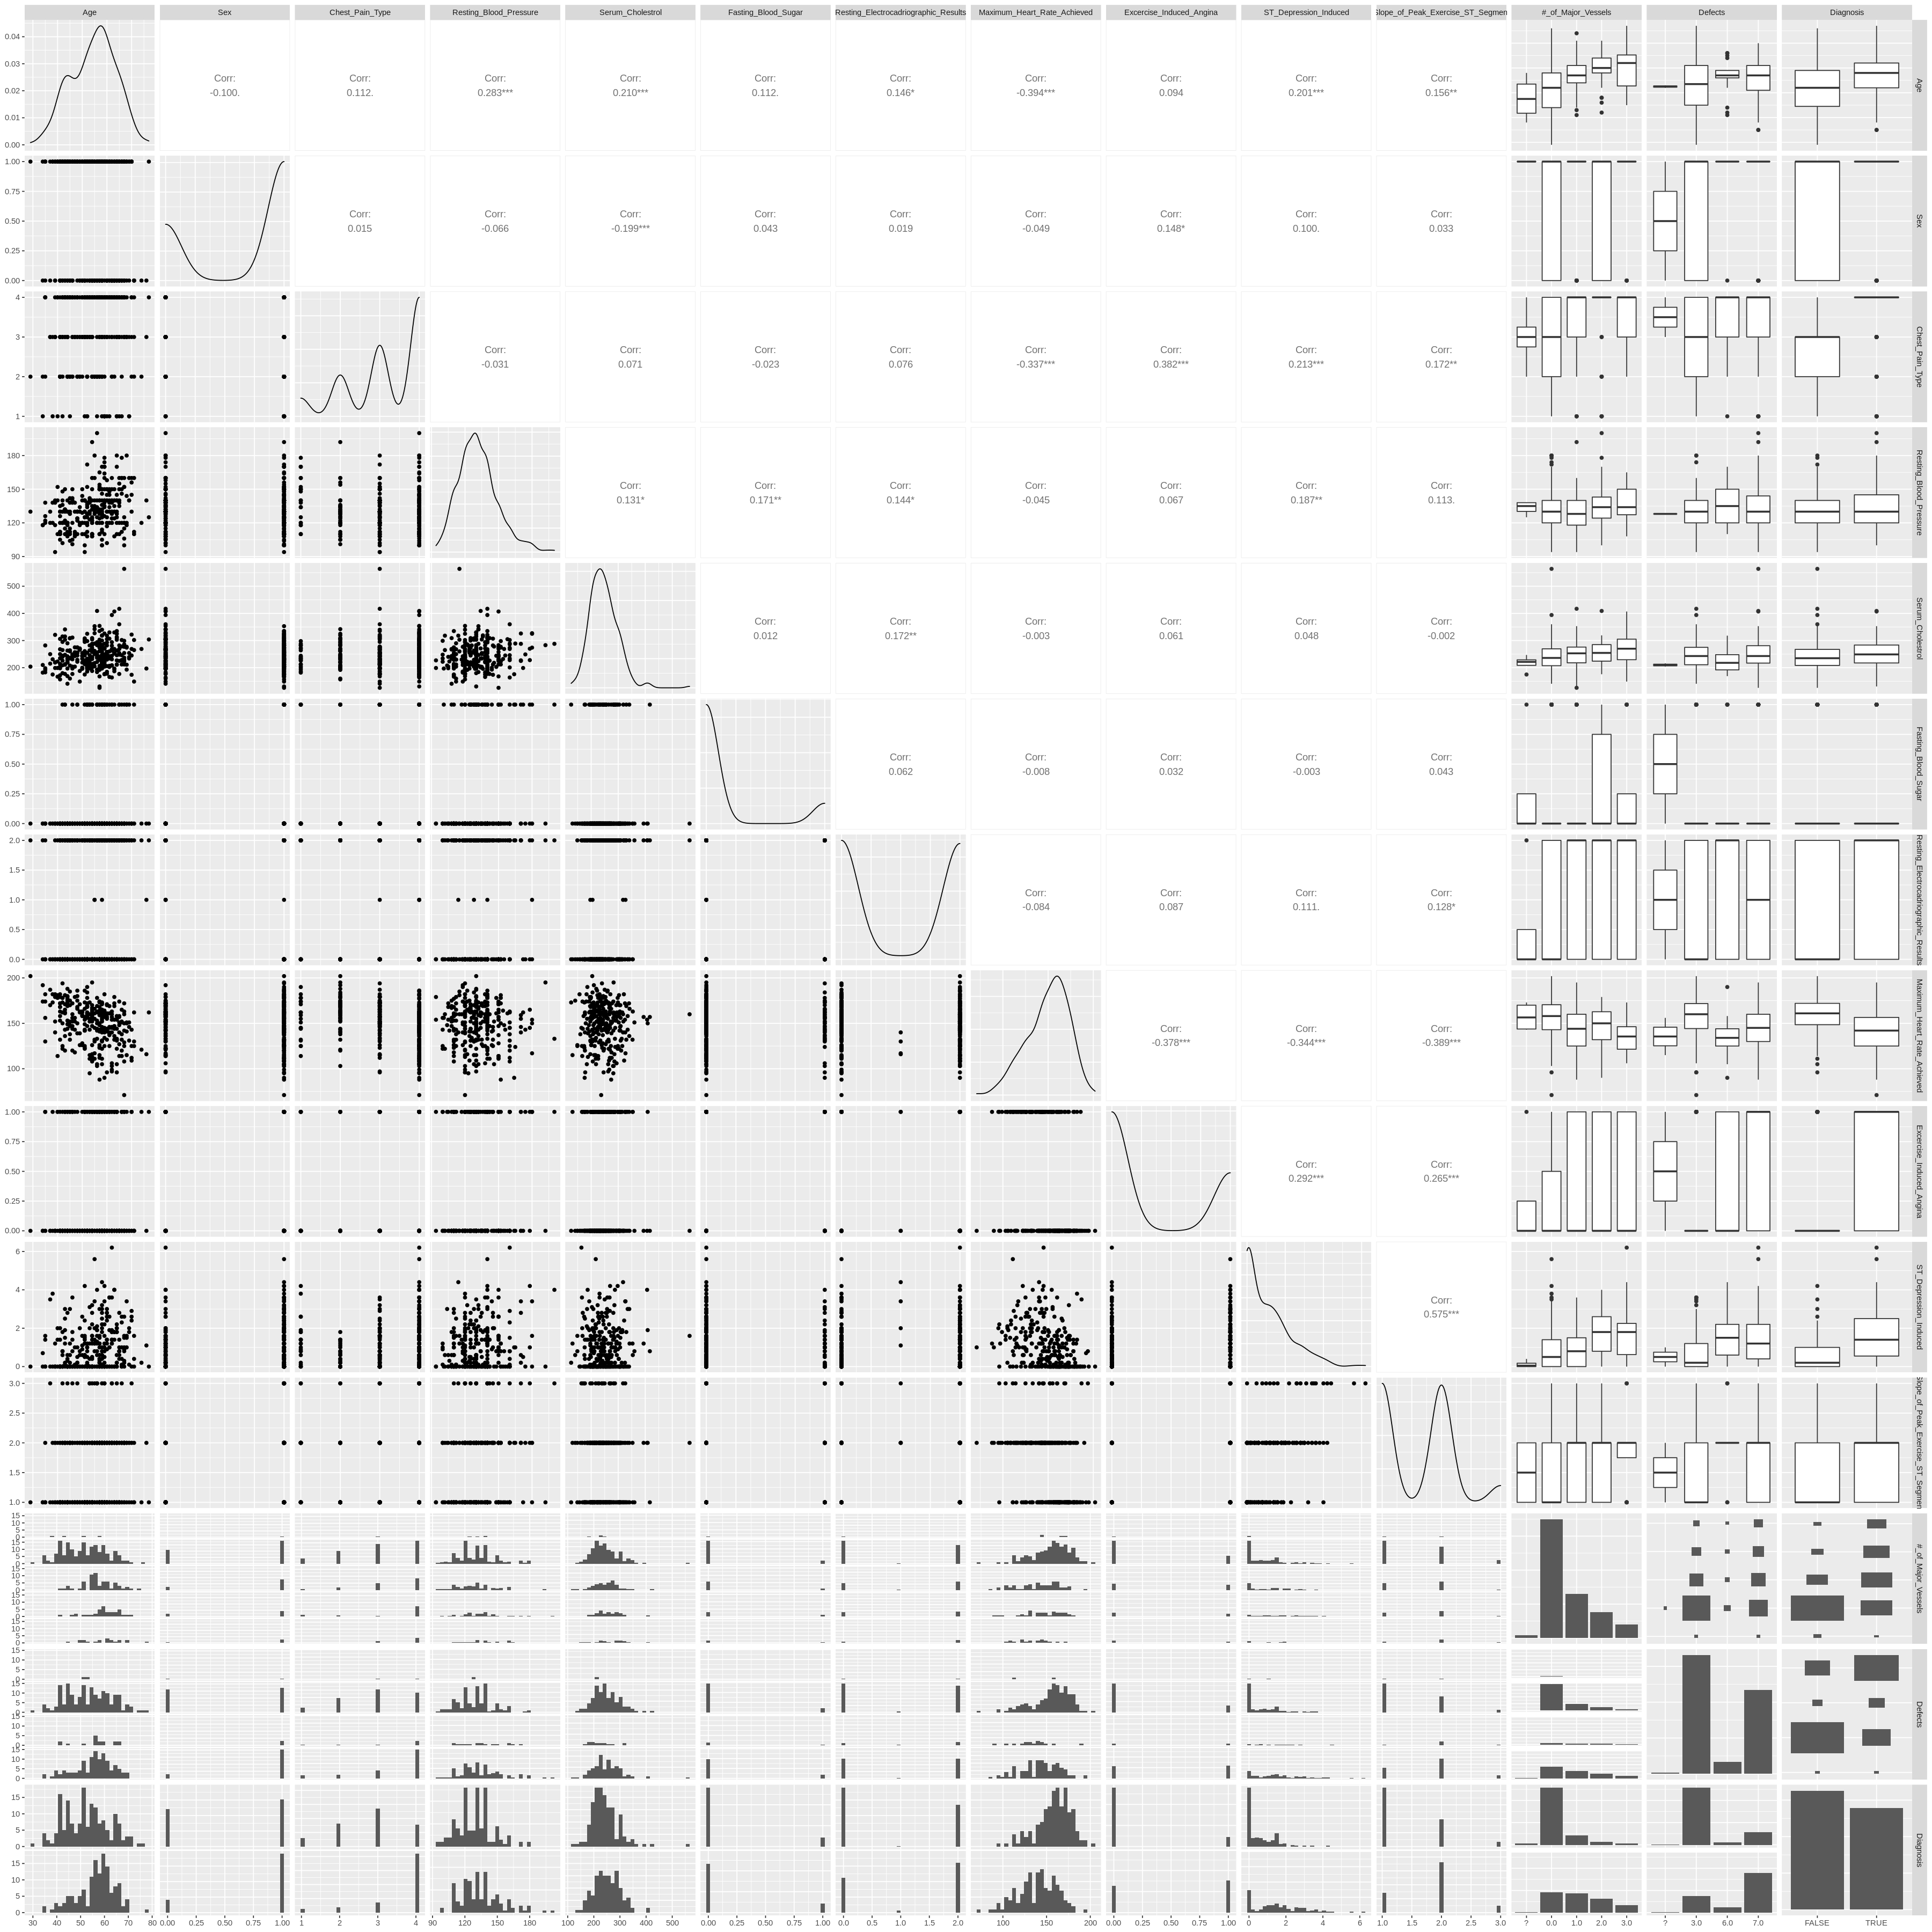

In [13]:
options(repr.plot.height = 30, repr.plot.width = 30)
variable_relationship <- mutated_cleveland_heart |>
    select(-Diagnosis_of_Heart_Disease) |>
    ggpairs()

variable_relationship

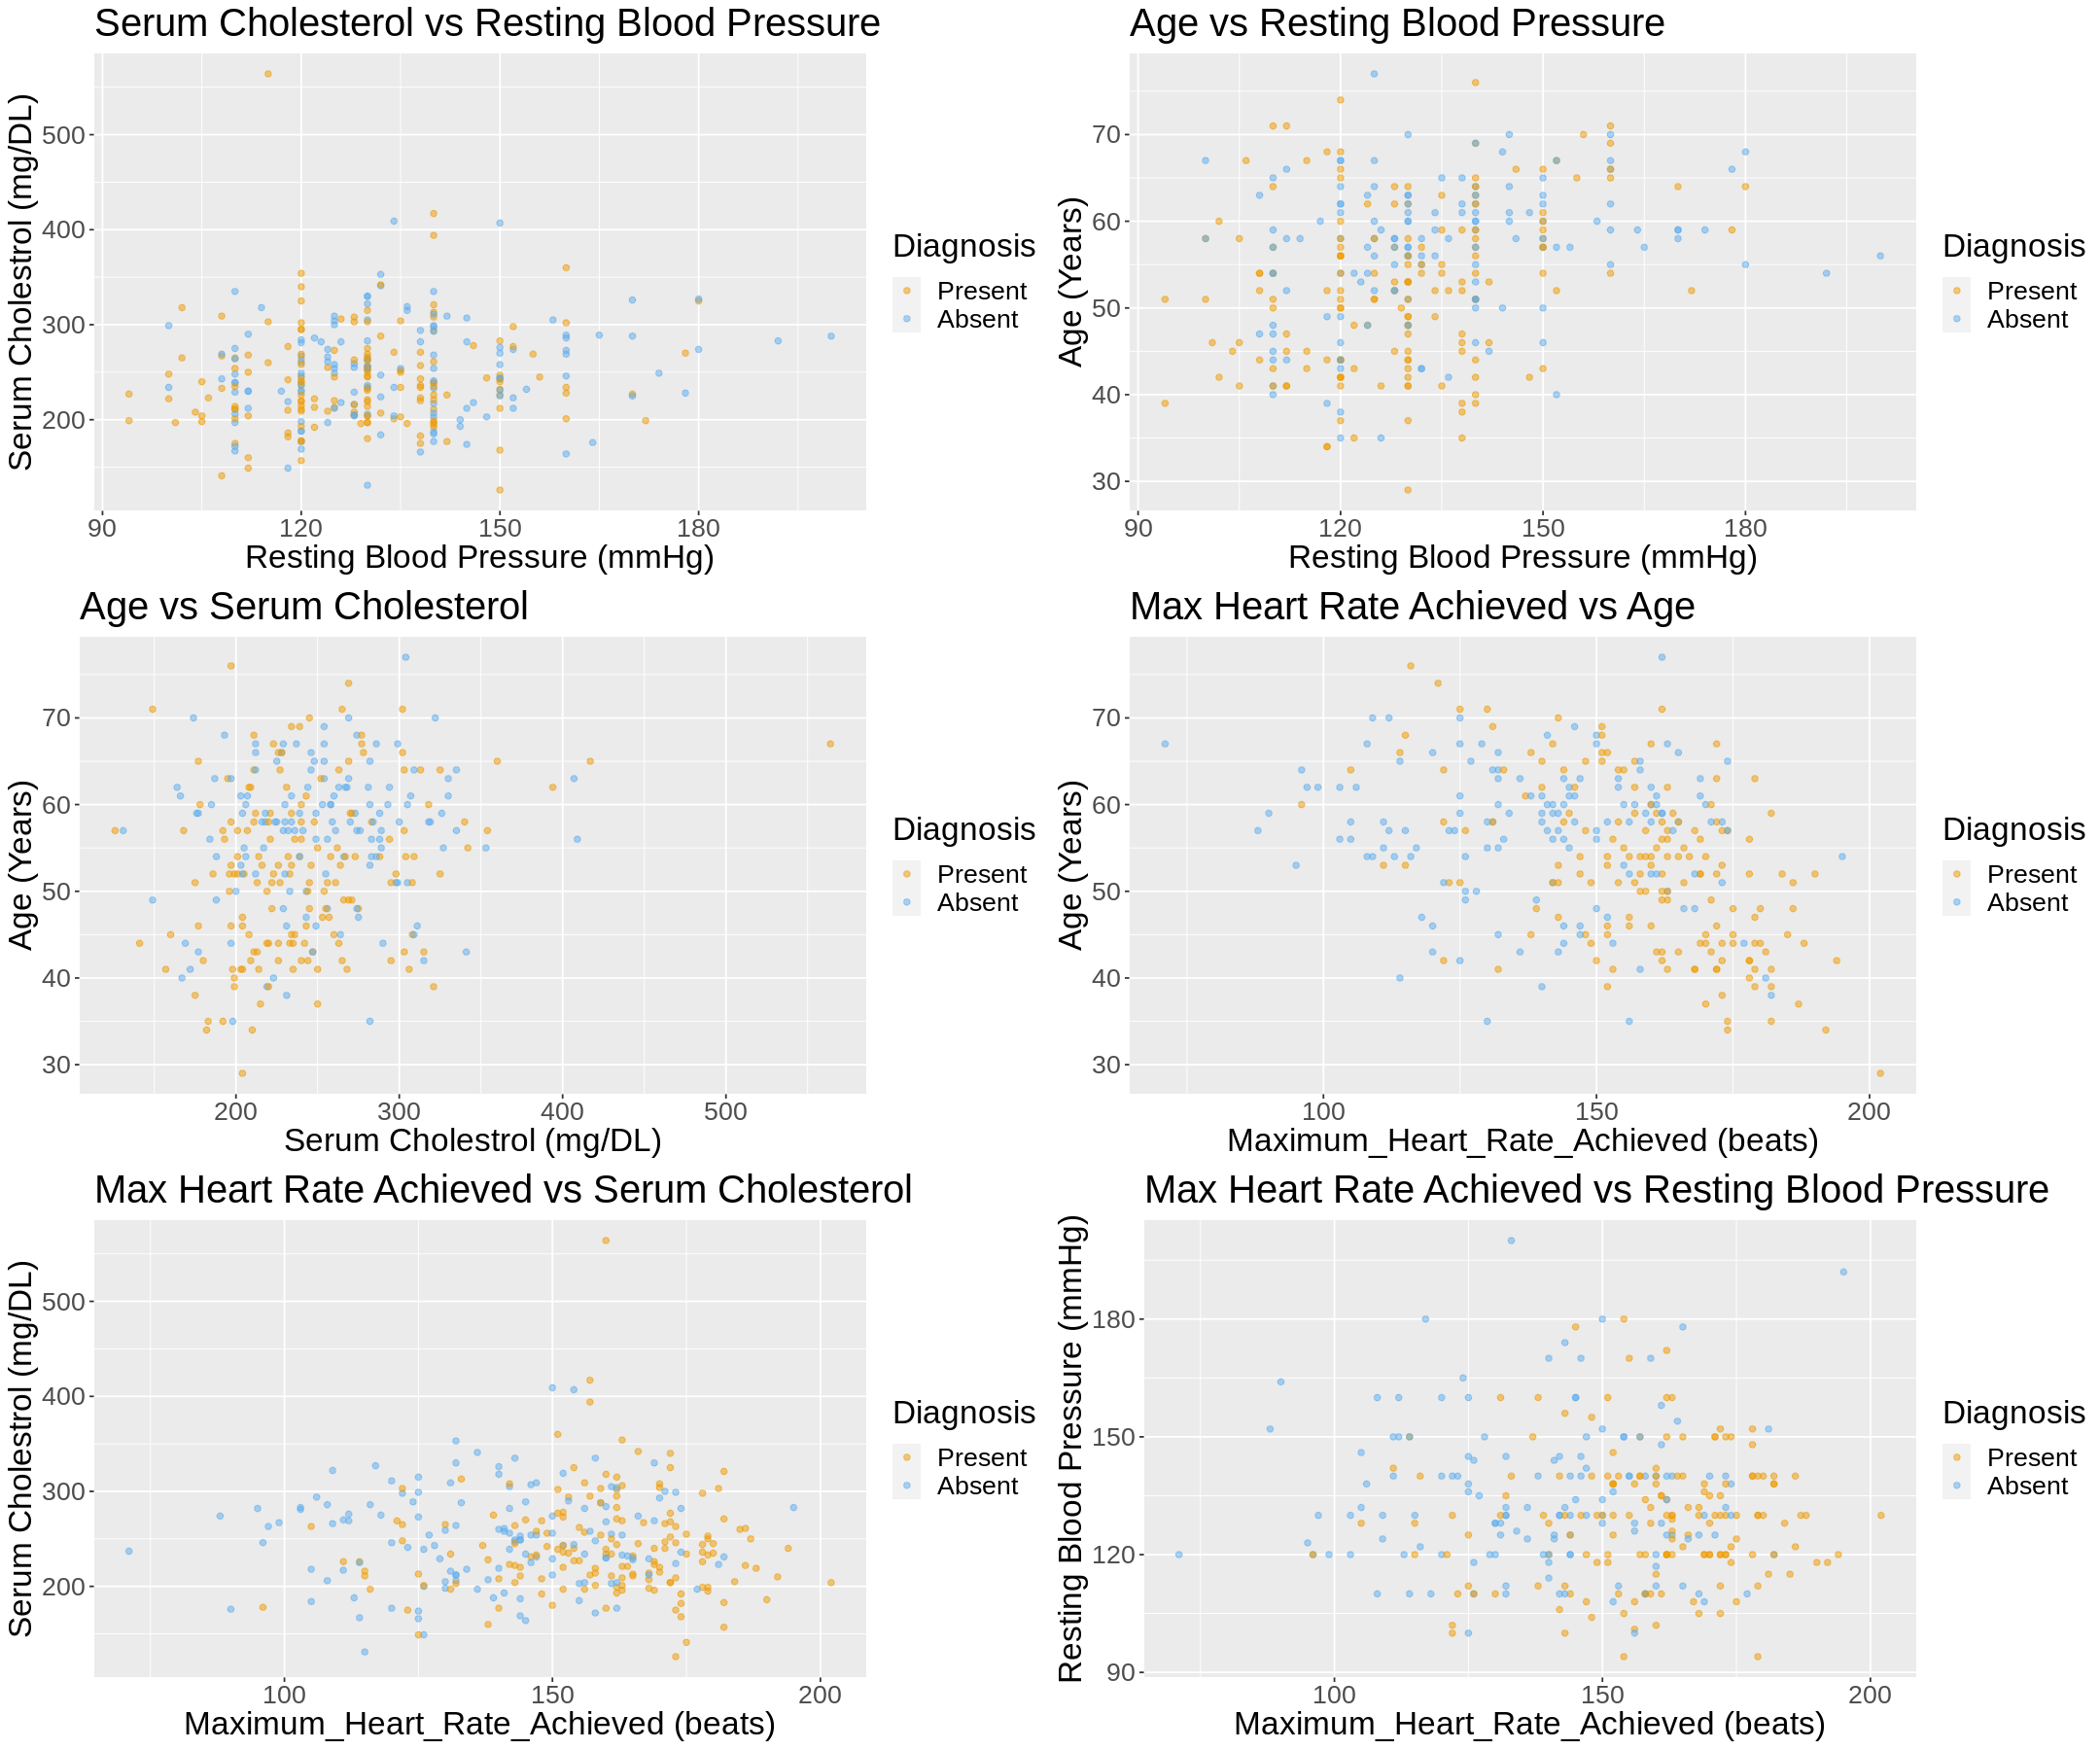

In [18]:
#We then selected the variables that we need to build a model and we changed the diagnosis of Heart Disease to a factor data type instead of logic.
cleveland_heart_yes <- mutated_cleveland_heart |>
    select(Age, Resting_Blood_Pressure, Serum_Cholestrol, Maximum_Heart_Rate_Achieved, Diagnosis)|>
    mutate("Diagnosis" = as_factor(Diagnosis))

options(repr.plot.height = 15, repr.plot.width = 18)
heart_yee <- cleveland_heart_yes |>
  ggplot(aes(x = Resting_Blood_Pressure, y = Serum_Cholestrol, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Resting Blood Pressure (mmHg)" , y= "Serum Cholestrol (mg/DL)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) +
    ggtitle("Serum Cholesterol vs Resting Blood Pressure")
heart_yee2 <- cleveland_heart_yes |>
  ggplot(aes(x = Resting_Blood_Pressure, y = Age, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Resting Blood Pressure (mmHg)", y = "Age (Years)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) + 
    ggtitle("Age vs Resting Blood Pressure")
heart_yee3 <- cleveland_heart_yes |>
  ggplot(aes(x = Serum_Cholestrol, y = Age, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Serum Cholestrol (mg/DL)" , y ="Age (Years)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) +
        ggtitle("Age vs Serum Cholesterol")
heart_yee4 <- cleveland_heart_yes |>
  ggplot(aes(x = Maximum_Heart_Rate_Achieved, y = Age, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Maximum_Heart_Rate_Achieved (beats)" , y ="Age (Years)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) +
        ggtitle("Max Heart Rate Achieved vs Age")
heart_yee5 <- cleveland_heart_yes |>
  ggplot(aes(x = Maximum_Heart_Rate_Achieved, y = Serum_Cholestrol, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Maximum_Heart_Rate_Achieved (beats)" , y ="Serum Cholestrol (mg/DL)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) +
        ggtitle("Max Heart Rate Achieved vs Serum Cholesterol")
heart_yee6 <- cleveland_heart_yes |>
  ggplot(aes(x = Maximum_Heart_Rate_Achieved, y = Resting_Blood_Pressure, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(x = "Maximum_Heart_Rate_Achieved (beats)" , y = "Resting Blood Pressure (mmHg)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20)) +
        ggtitle("Max Heart Rate Achieved vs Resting Blood Pressure")
library(gridExtra) #added this library in order to use grid.arrange
grid.arrange(heart_yee, heart_yee2, heart_yee3, heart_yee4, heart_yee5, heart_yee6, ncol=2)

<em>Figure _: This figure compares the different possible predictors to each other. After reviewing them all, we saw that the middle right graph shows the best different in between predictors. By this we mean that when maximum heart rate achieved is lower, there is more absence of heart disease, and when it is higher there is more heart disease present. Another decisison to choose these predicotrs was that after having made the model, we decided to remove serum chloestrol and resting blood pressure from our model to test our new hypothesis. It was seen that our testing accuracy increased after fitting our model with the new predictors, this showed us that age and maximum heart rate was very influential predictor variables.</em>

In [19]:
#We then selected the variables that we need to build a model and we changed the diagnosis of Heart Disease to a factor data type instead of logic.
cleveland_heart_cleaned <- mutated_cleveland_heart |>
    select(Age, Maximum_Heart_Rate_Achieved, Diagnosis)|>
    mutate("Diagnosis" = as_factor(Diagnosis))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



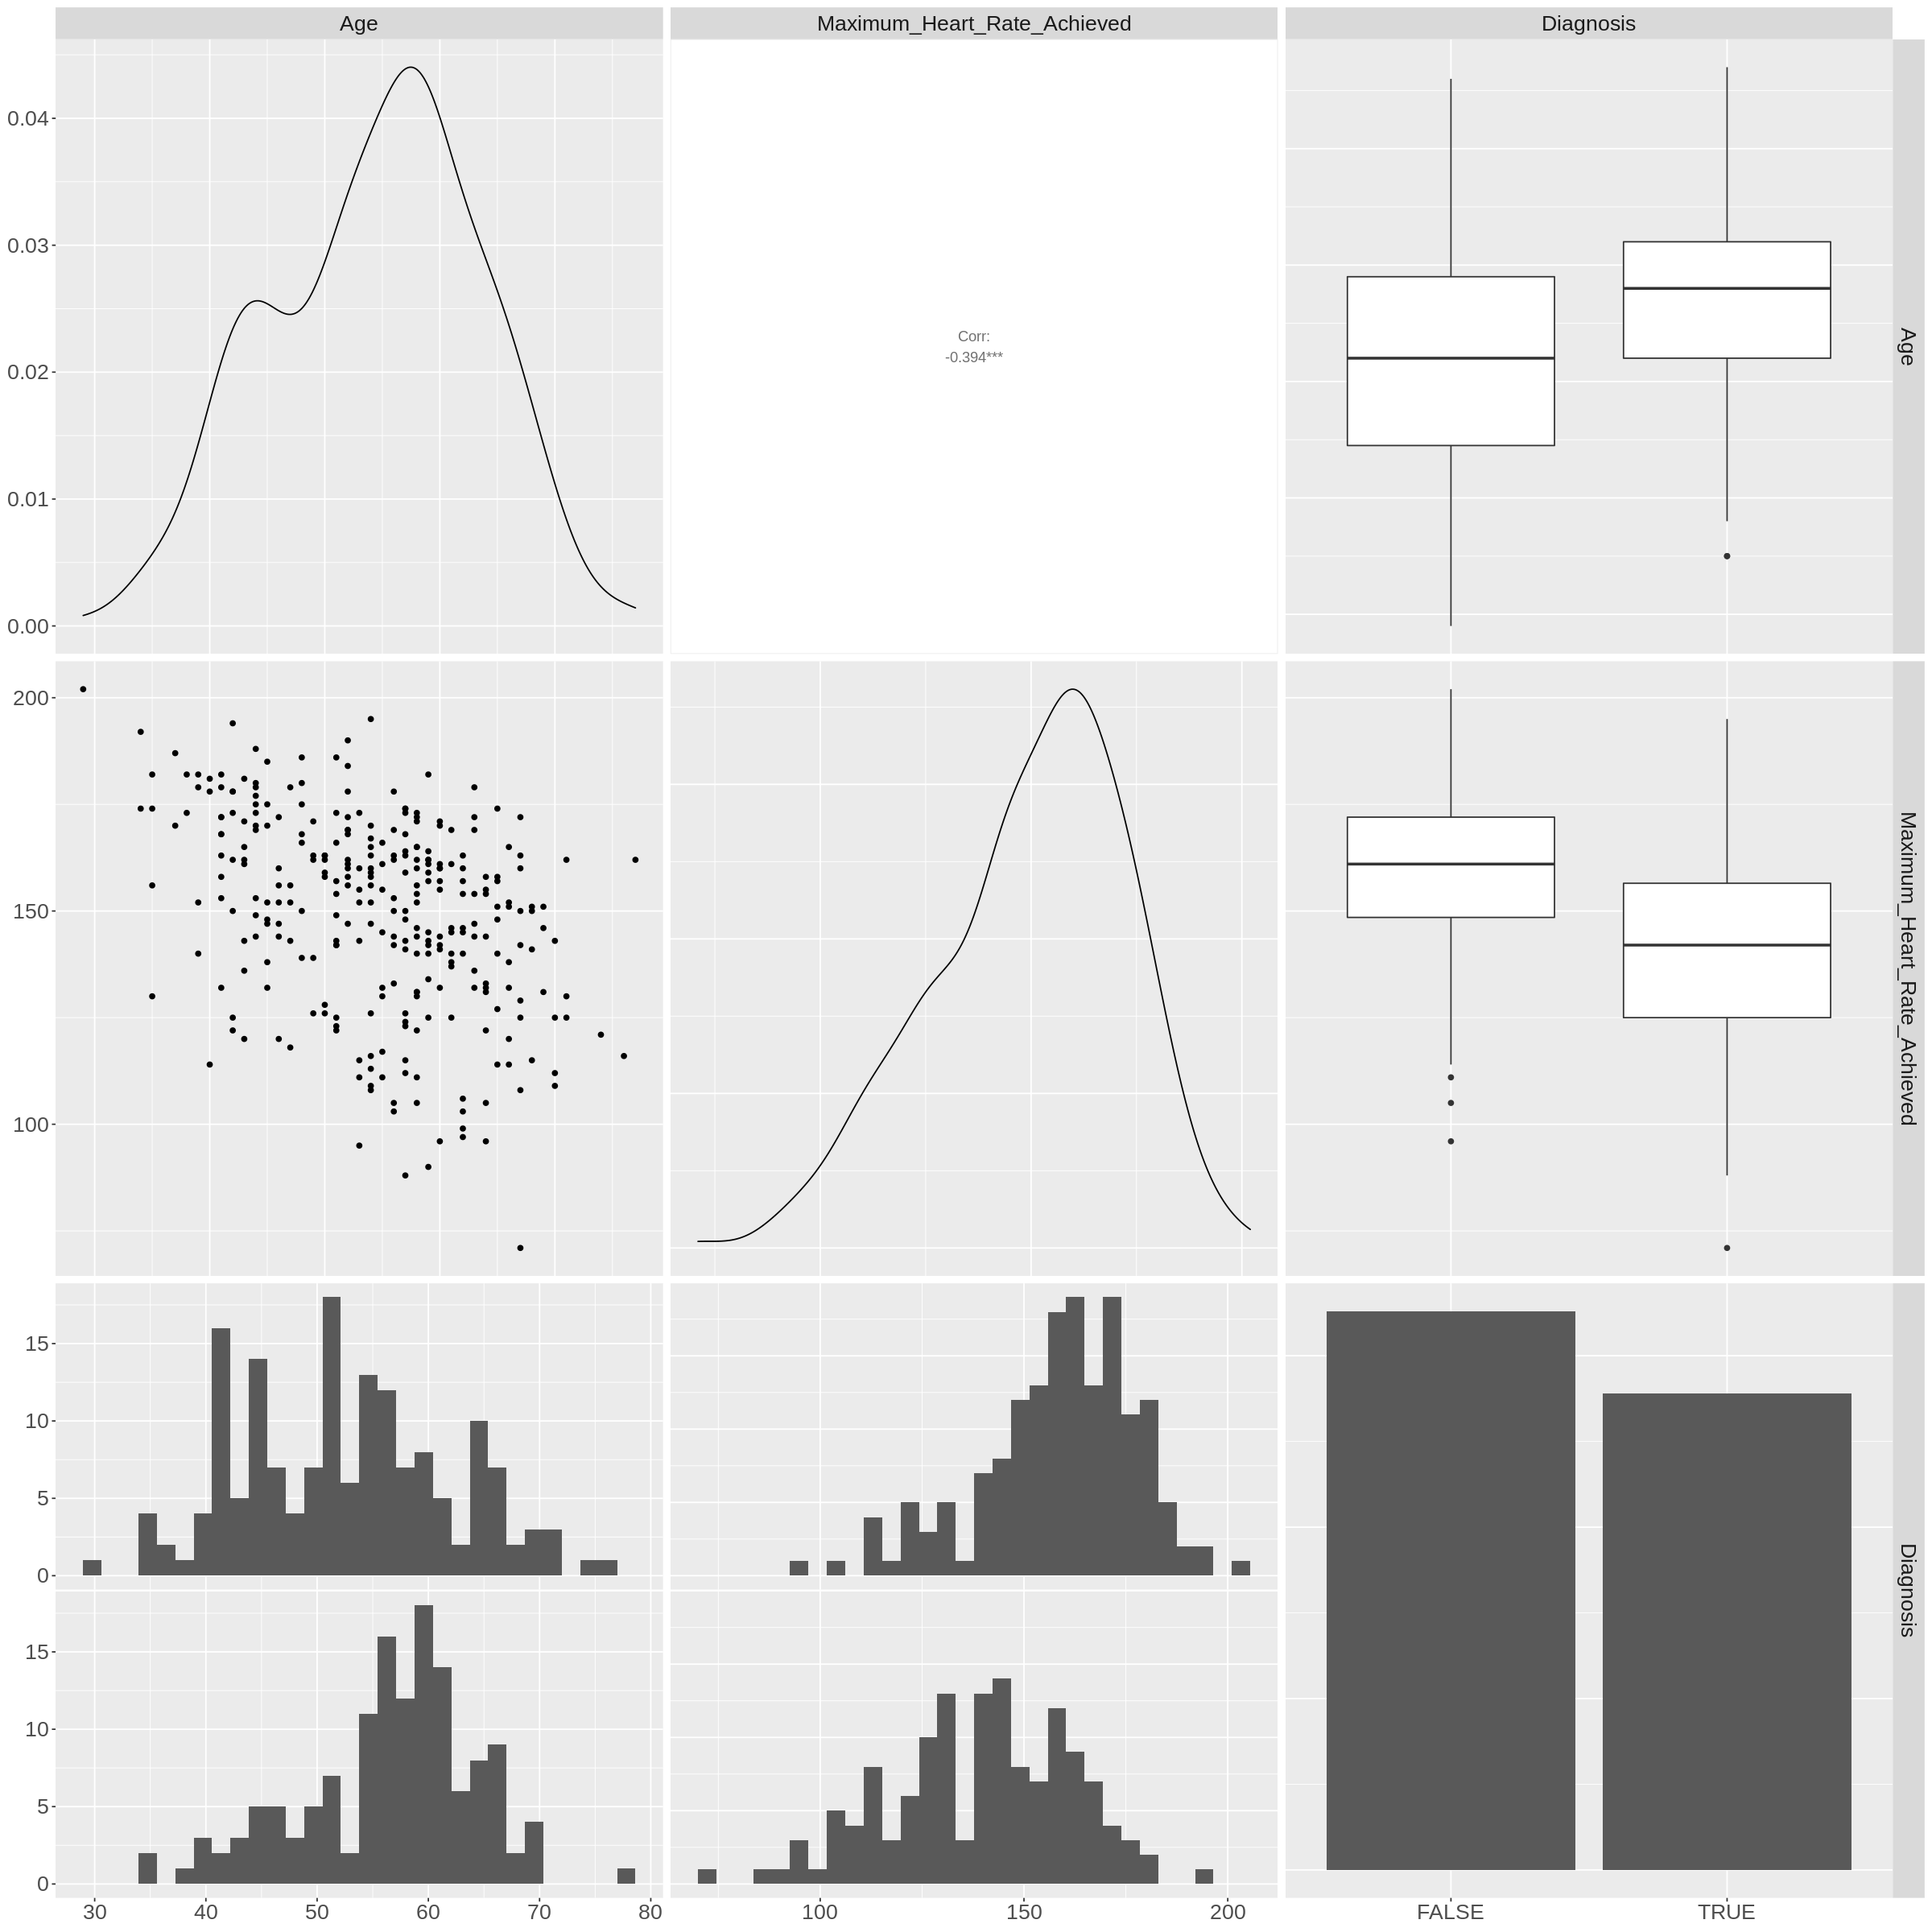

In [20]:
options(repr.plot.height = 20, repr.plot.width = 20)
predictor_relationships <- cleveland_heart_cleaned |>
    select(Age:Diagnosis) |>
    ggpairs() +
    theme(text = element_text(size = 20))

predictor_relationships

In [21]:
#The mean of each predictor was taken from the training data and grouped by age to see any trends.
training_heart_mean <- cleveland_heart_cleaned |>
    group_by(Diagnosis) |>
    summarize(Maximum_Heart_Rate_Achieved = mean(Maximum_Heart_Rate_Achieved),
             Age = mean(Age))
head(training_heart_mean)

Diagnosis,Maximum_Heart_Rate_Achieved,Age
<fct>,<dbl>,<dbl>
FALSE,158.4294,52.52147
TRUE,139.2590,56.62590


In [27]:
# We then split the data set to a training and testing set randomly.
set.seed(2023)

heart_split <- initial_split(cleveland_heart_cleaned, prop = 0.75, strata = Diagnosis)
training_heart <- training(heart_split)
testing_heart <- testing(heart_split)

glimpse(training_heart)
glimpse(testing_heart)

Rows: 226
Columns: 3
$ Age                         <dbl> 57, 57, 44, 57, 54, 49, 50, 66, 43, 59, 44…
$ Maximum_Heart_Rate_Achieved <dbl> 163, 148, 173, 174, 160, 171, 158, 114, 17…
$ Diagnosis                   <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
Rows: 76
Columns: 3
$ Age                         <dbl> 67, 37, 41, 56, 56, 52, 48, 64, 58, 58, 58…
$ Maximum_Heart_Rate_Achieved <dbl> 108, 187, 172, 178, 153, 162, 139, 144, 16…
$ Diagnosis                   <fct> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


- Here we wanted to ensure that the training set had the same proportion in each of the classses (FALSE and TRUE) as they present in the training data set.

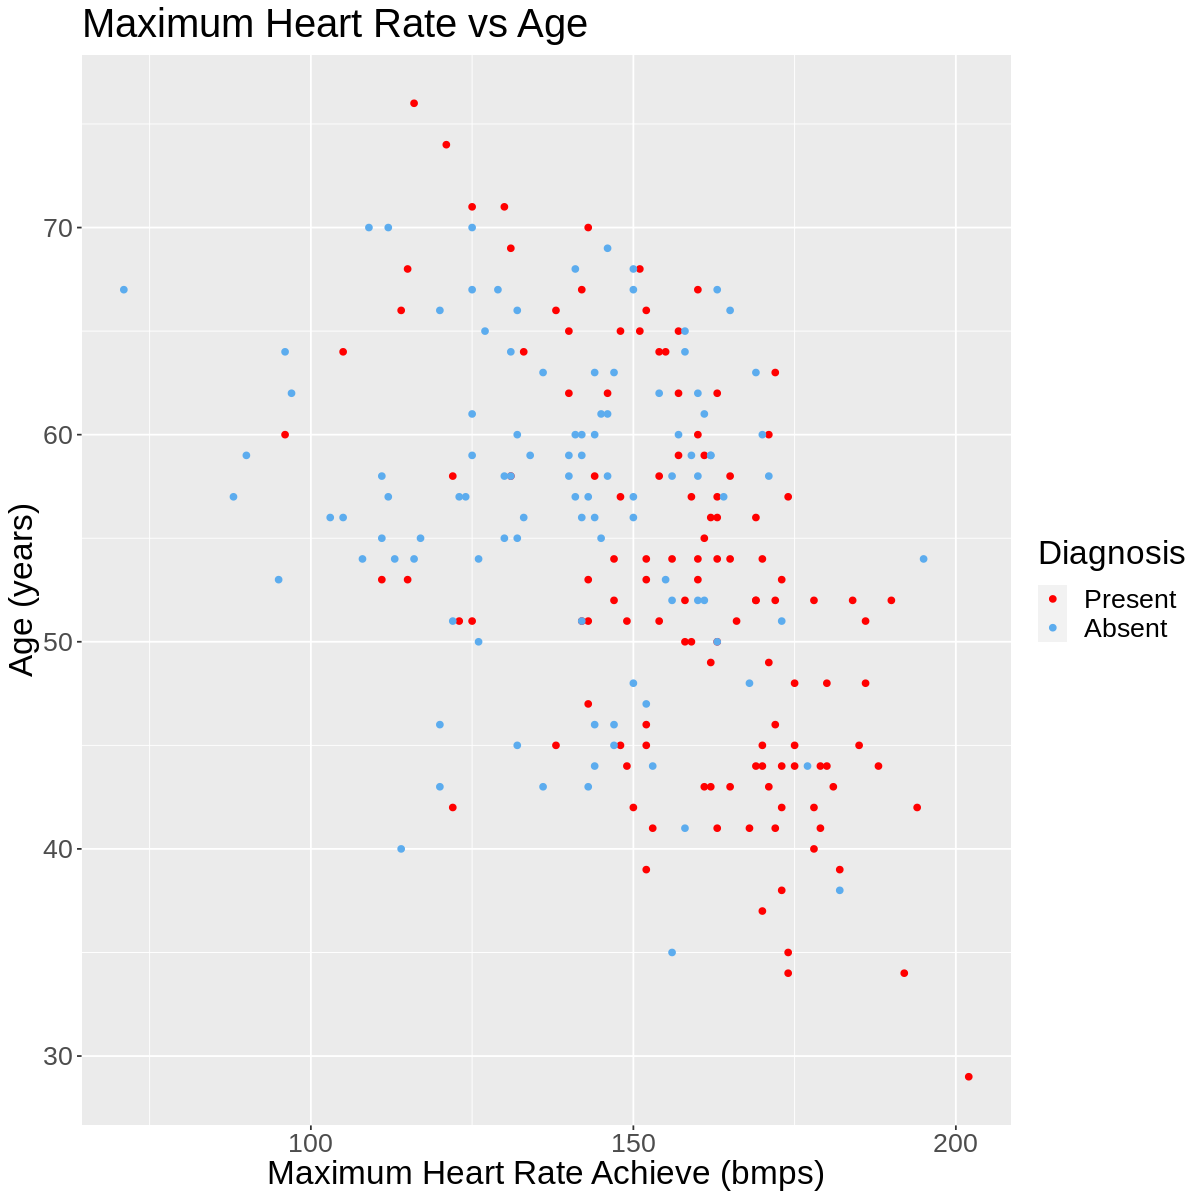

In [28]:
# We then visualized if there is any relationship between the predictors and the results from the training data set
# This graph is Serum_Cholestrol, Resting_Blood_Pressure vs Diagnosis (Present = TRUE, Absent = FALSE)
options(repr.plot.height = 10, repr.plot.width = 10)
heart_plot <- heart_train |>
  ggplot(aes(x = Maximum_Heart_Rate_Achieved, y = Age, color = Diagnosis)) +
  geom_point(alpha = 1) +
  labs(x = "Maximum Heart Rate Achieve (bmps)" , y= "Age (years)", color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("red", "steelblue2")) + 
    theme(text = element_text(size = 20)) +
    ggtitle("Maximum Heart Rate vs Age")

heart_plot

In [29]:
training_set_proportions <- heart_train |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(training_heart))
training_set_proportions

Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


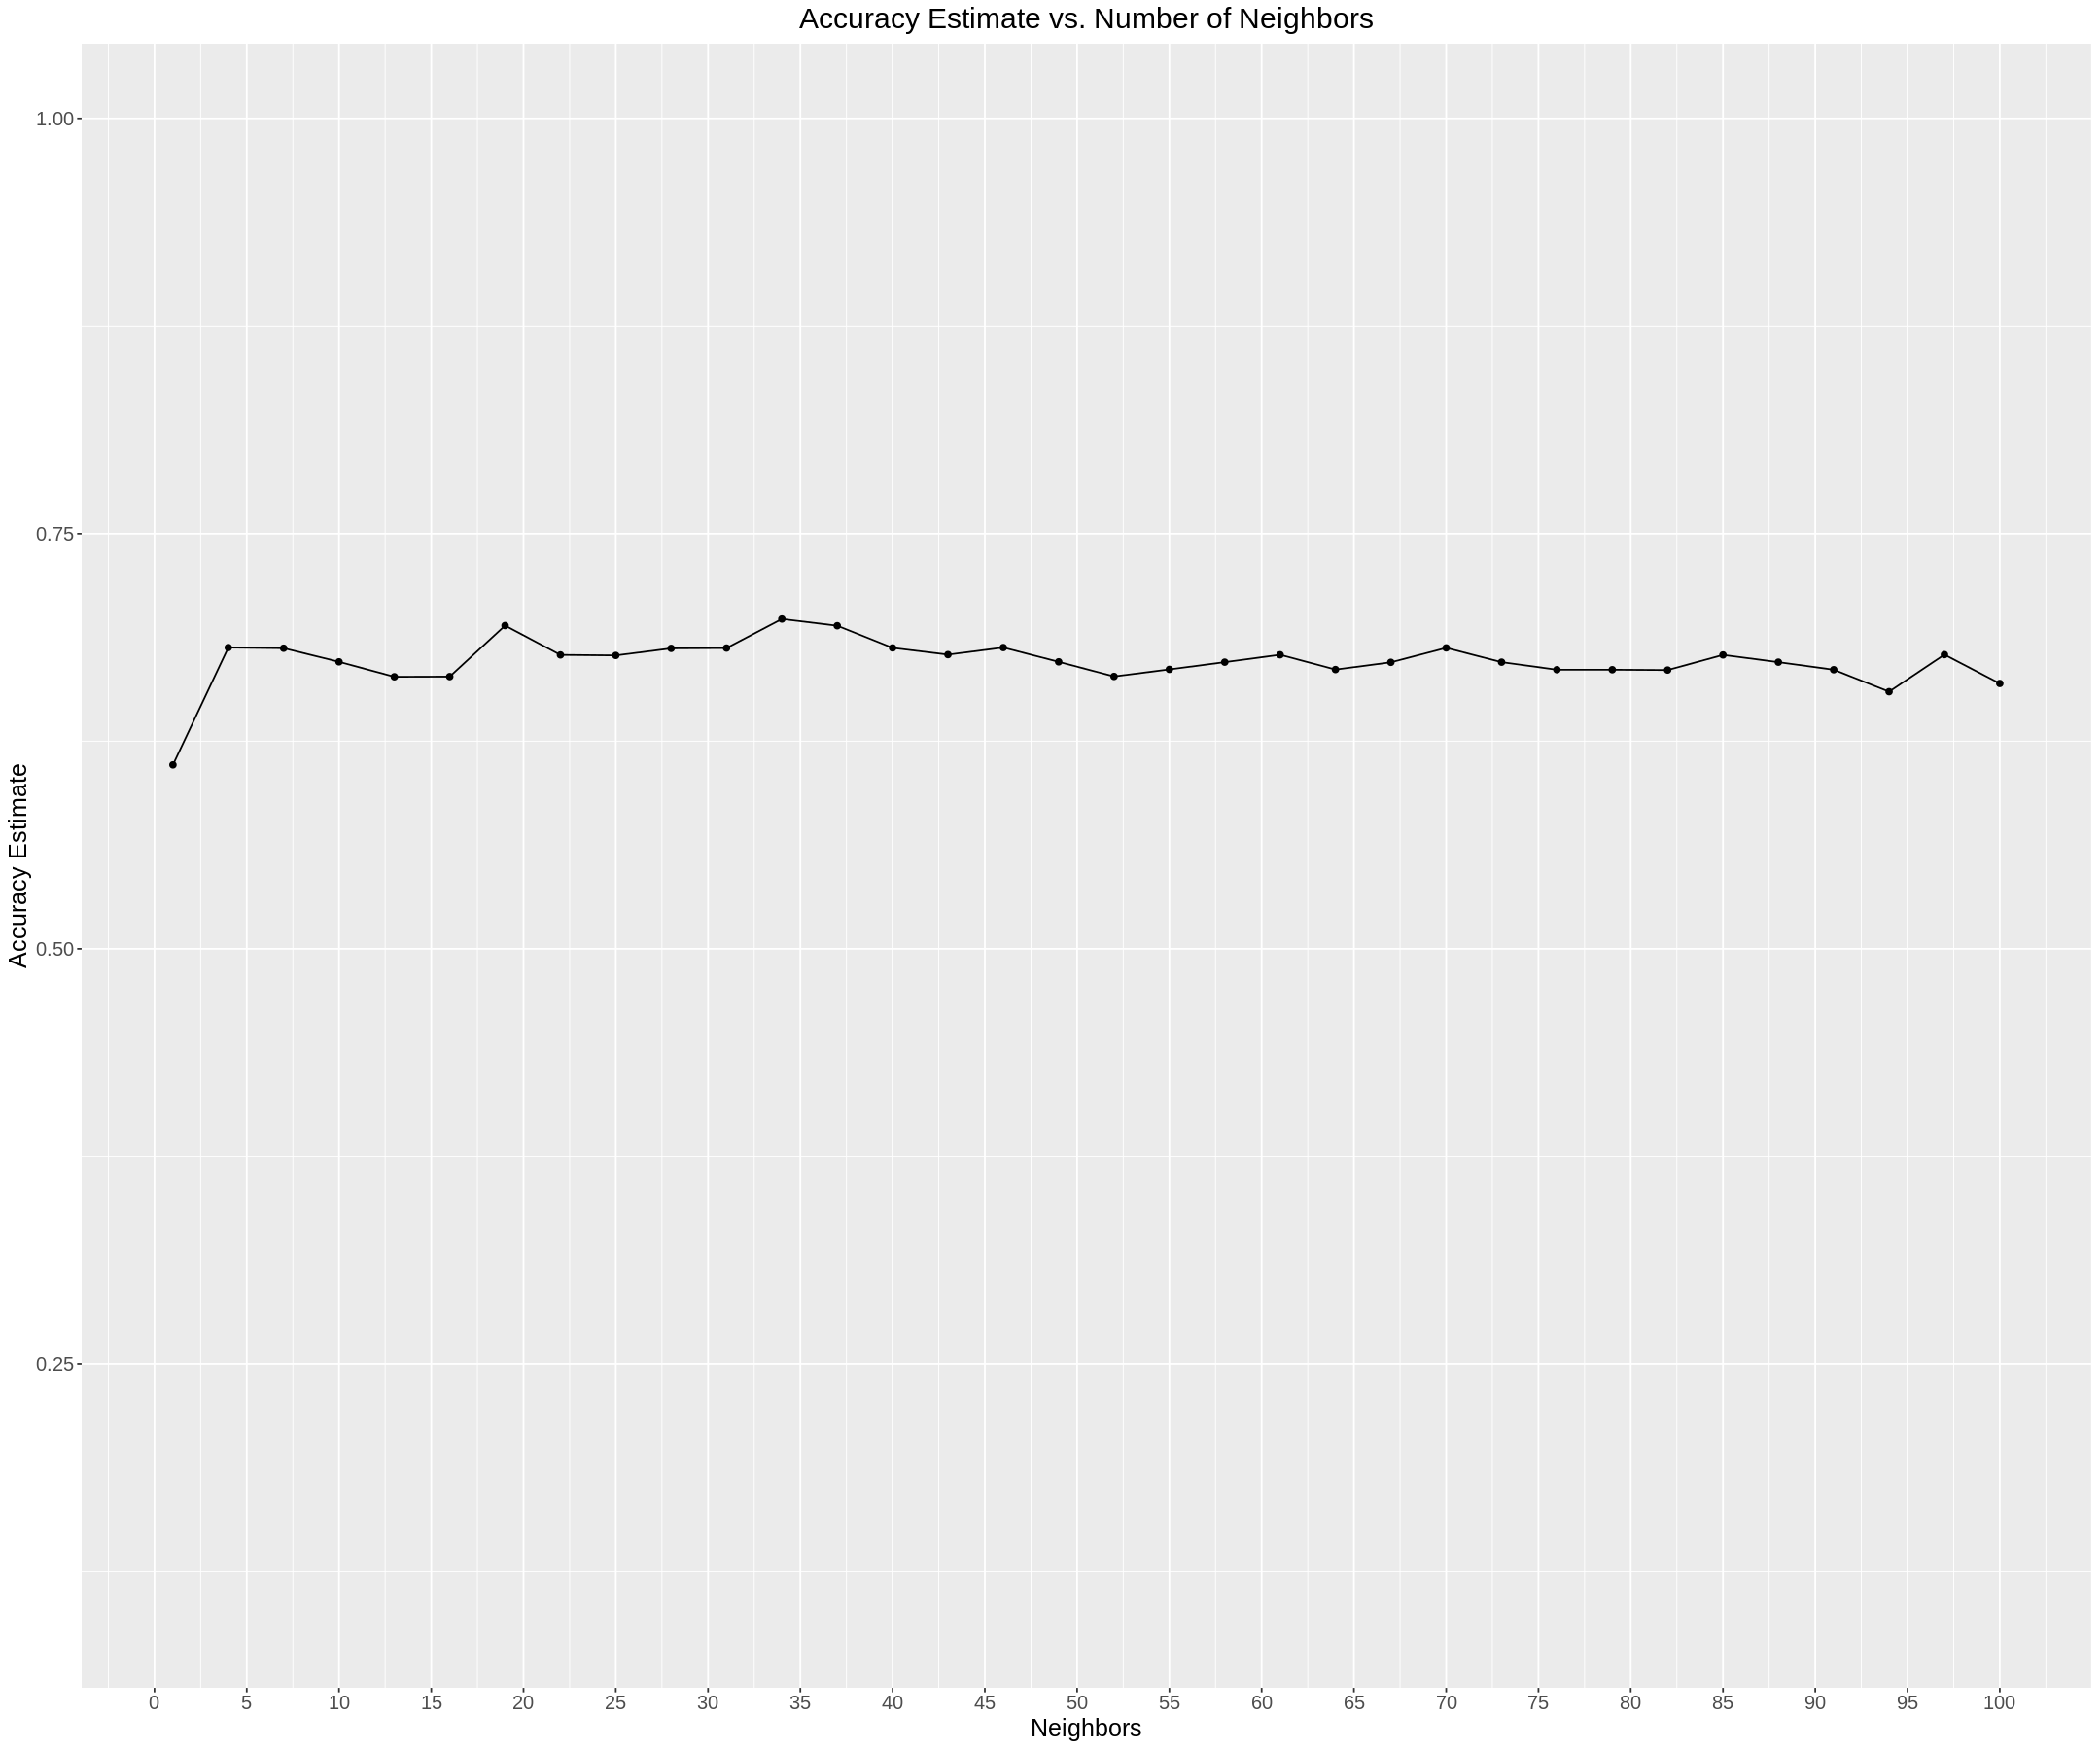

In [30]:
set.seed(2023)
heart_recipe <- recipe(Diagnosis ~ ., data = cleveland_heart_cleaned) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

values_vfold <- vfold_cv(training_heart, v = 5, strata = Diagnosis)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 3))

knn_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = values_vfold, grid = k_vals) |>
            collect_metrics()

accuracies <- knn_fit |>
    filter(.metric == "accuracy")

options(repr.plot.height = 15, repr.plot.width = 18)

neighbours_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy Estimate vs. Number of Neighbors") +
    scale_x_continuous(breaks = seq(0, 150, by = 5)) + 
    scale_y_continuous(limits = c(0.1, 1.0)) + 
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
    
neighbours_plot

In [31]:
best_k <- accuracies |> 
    arrange(desc(mean)) |>
    slice(1) |>
    select(neighbors) |> 
    pull()
best_k
knn_spec_best <- nearest_neighbor(weight_func = 'rectangular', neighbors = best_k) |>
    set_engine('kknn') |>
    set_mode('classification')

model_fit_max <- workflow() |> 
    add_recipe(heart_recipe) |>
    add_model(knn_spec_best) |>
    fit(data = training_heart)

[1] 34

In [32]:
model_predictions_test <- predict(model_fit_max, testing_heart) |>
    bind_cols(testing_heart) 
head(model_predictions_test)

heart_metrics_test <- model_predictions_test |>
    metrics(truth = Diagnosis, estimate = .pred_class) |> 
    filter(.metric == 'accuracy')
heart_metrics_test

# accruacy on the testing data

heart_conf_mat <- model_predictions_test |>
    conf_mat(truth = Diagnosis, estimate = .pred_class)
heart_conf_mat

.pred_class,Age,Maximum_Heart_Rate_Achieved,Diagnosis
<fct>,<dbl>,<dbl>,<fct>
TRUE,67,108,TRUE
FALSE,37,187,FALSE
FALSE,41,172,FALSE
FALSE,56,178,FALSE
FALSE,56,153,FALSE
FALSE,52,162,FALSE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7368421


          Truth
Prediction FALSE TRUE
     FALSE    34   13
     TRUE      7   22

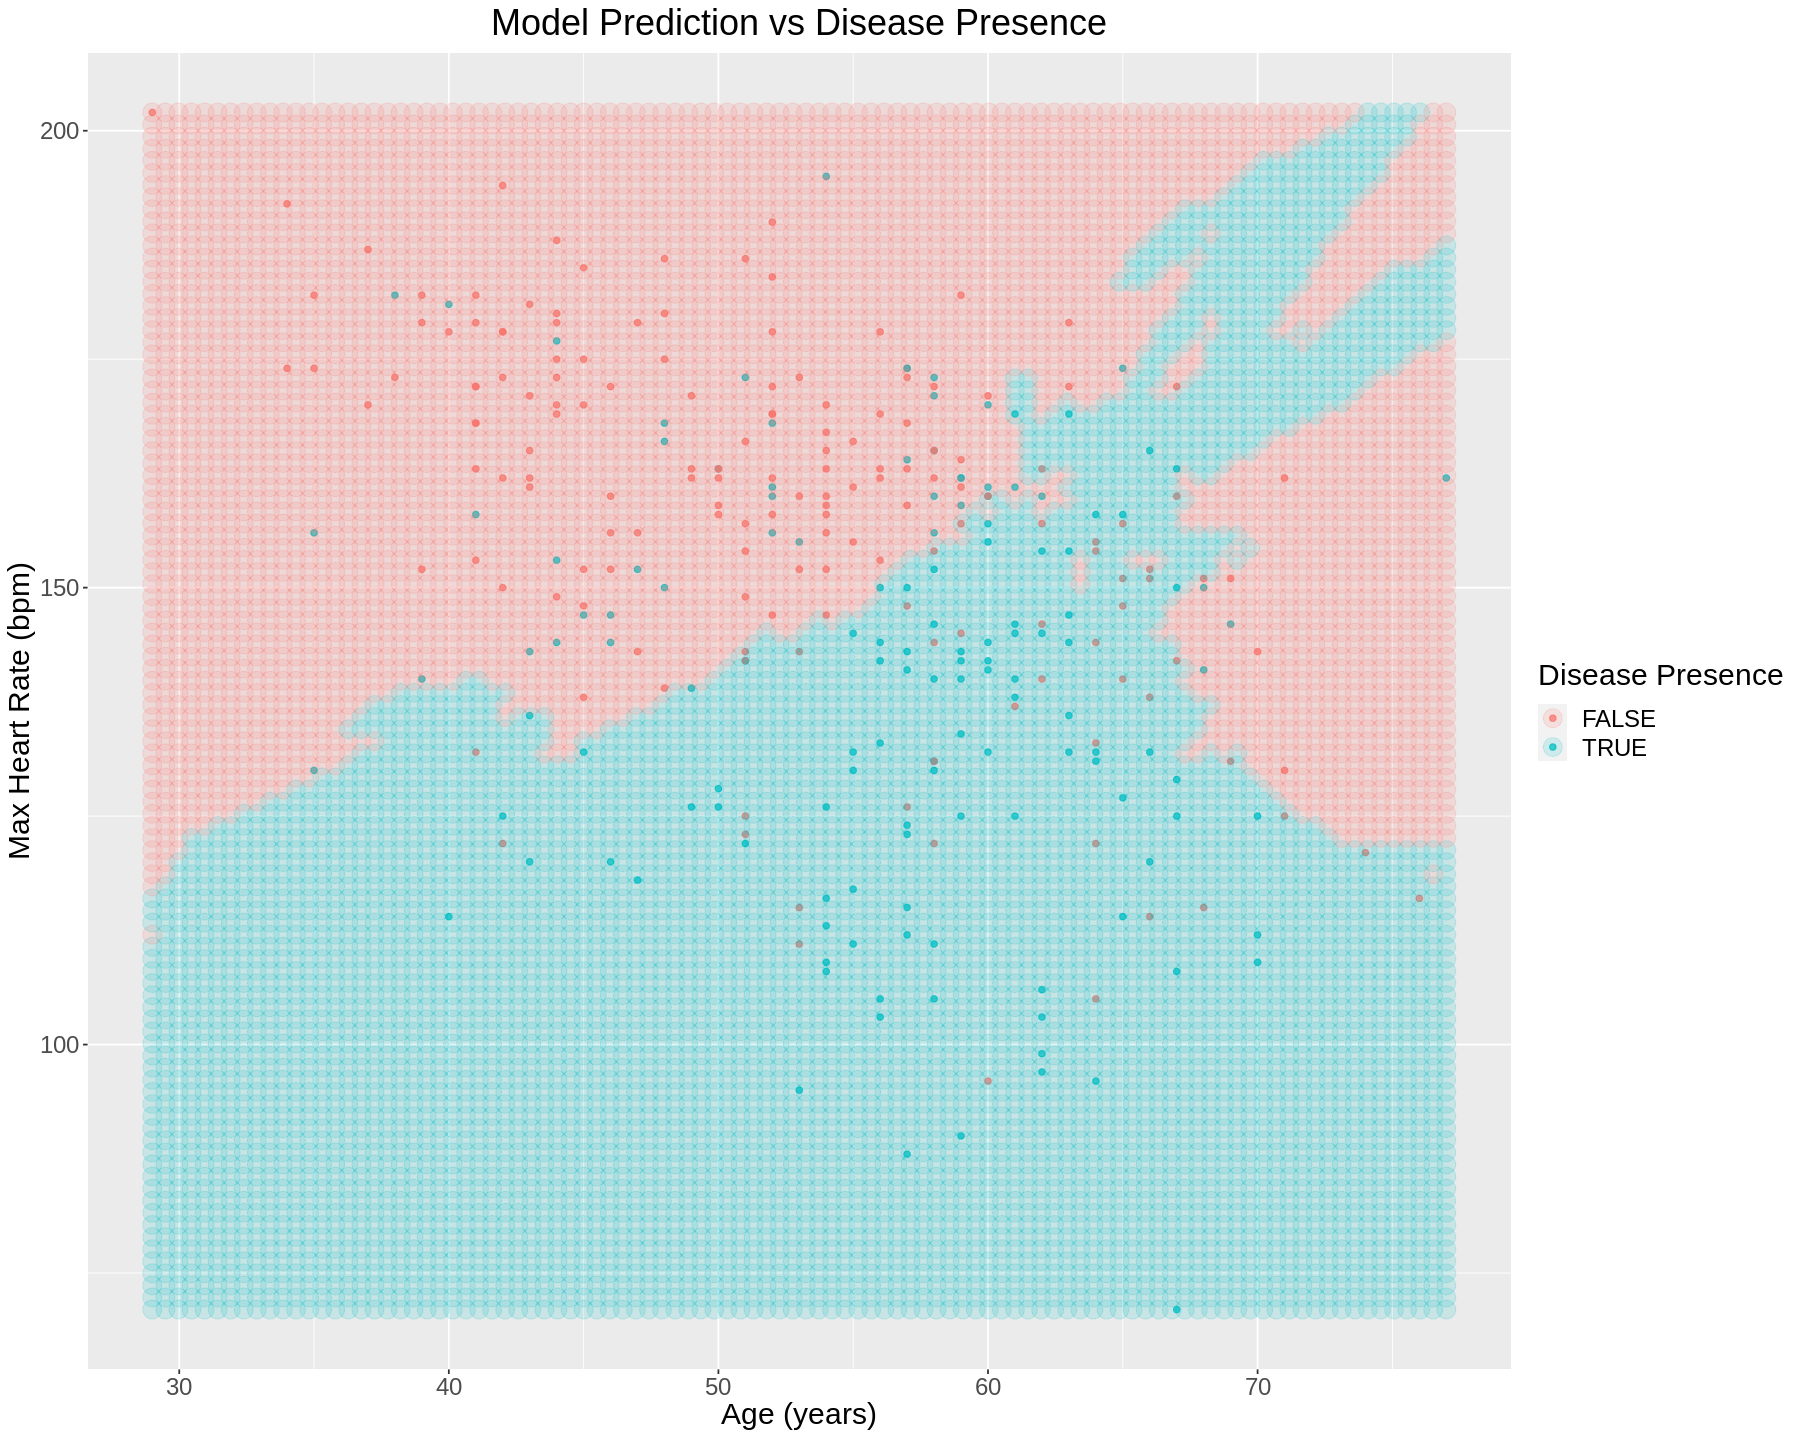

In [34]:
are_grid <- seq(min(cleveland_heart_cleaned $Age, na.rm = TRUE), 
                max(cleveland_heart_cleaned $Age, na.rm = TRUE), 
                length.out = 100)
smo_grid <- seq(min(cleveland_heart_cleaned $Maximum_Heart_Rate_Achieved, na.rm = TRUE), 
                max(cleveland_heart_cleaned $Maximum_Heart_Rate_Achieved, na.rm = TRUE), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(Age = are_grid, 
                                Maximum_Heart_Rate_Achieved = smo_grid))

PredGrid <- predict(model_fit_max, asgrid)

prediction_table <- bind_cols(PredGrid, asgrid) %>%
  rename(Class = .pred_class)

options(repr.plot.height = 12, repr.plot.width = 15)

plot_predictor_true <- ggplot() +
    geom_point(data = cleveland_heart_cleaned, 
    mapping = aes(x = Age, 
                  y = Maximum_Heart_Rate_Achieved,
                  color = Diagnosis),
                   alpha = 0.75) +
    geom_point(data = prediction_table, mapping = aes(x = Age, y = Maximum_Heart_Rate_Achieved, color = Class), 
                alpha = 0.15, size = 5) +
                labs(color = "Disease Presence", x = "Age (years)", y = "Max Heart Rate (bpm)") +
                theme(text = element_text(size = 16)) +
                ggtitle("Model Prediction vs Disease Presence") +
                
                theme(plot.title = element_text(vjust = 1, hjust = 0.5), text = element_text(size = 18))
plot_predictor_true

## Methods:
We will use age, resting blood pressure, and serum cholesterol as variables and compare all of these factors against the heart disease diagnosis, in order to determine whether or not they have an impact on heart disease diagnosis. One way to visualize this would be to make a histogram of each category against the heart disease diagnosis, to see if increasings blood pressure, for example, has a correlation on the diagnosis.

The steps we will perform to complete our project include: 
1. Split the dataset into testing and training data
2. Determine which k to use; test different k values - plot the k vs. accuracy
3. With the best value of k (nearest neighbour, recipe), make a model with the training set
4. Make a prediction based on the model
5. Test it using the testing data
6. Compare our results with the results from the testing dataset for accuracy

## Expected outcomes and significance:

#### What do you expect to find?
- We expect to see a positive correlation in age, resting blood pressure, and serum cholesterol levels with the risk of heart disease which aligns with previous research papers. In other words, each variable will have its own positive correlation with the risk of heart disease.

#### What impact could such findings have?
- These findings can be used to consider the factors that could influence the general public's risk of heart disease. For example, if there is a significant spike in the presence of heart disease after a certain age, then it could be recommended for people near that age to closely monitor their heart health and receive regular checkups.

#### What future questions could this lead to?
- If a significant correlation appears between a variable and the presence of heart disease, then the next step would be to conduct further research to examine the underlying biological cause of this observed trend.

### References:
- National Center for Chronic Disease Prevention and Health Promotion, Division for Heart Disease and Stroke Prevention. (2023, Feb. 24). Heart Disease. cdc.gov. https://www.cdc.gov/heartdisease/index.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,%2C%20in%20some%20cases%2C%20medicine
- National Institute of Health, Heart Health and Aging. (2018, June 1). https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease
- UCI Machine Learning Repository. (Accessed 2023, Feb. 24). Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- World Health Organization. (2021, June 11). Cardiovascular diseases (CVDs). World Health Organization. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)